# Logistic - Explore the Data

## Raw Data

You are provided with the following data: **loan_data.csv**  
This is the historical data that the bank has provided. It has the following columns

**Application Attributes**:
- `years`: Number of years the applicant has been employed  
- `ownership`: Whether the applicant owns a house or not  
- `income`:  Annual income of the applicant  
- `age`: Age of the applicant  

**Behavioural Attributes**:
- `grade`:  Credit grade of the applicant

**Outcome Variable**:
- `amount` : Amount of Loan provided to the applicant  
- `interest`: Interest rate charged for the applicant  

**Target Variable**
- `default` : Whether the applicant has defaulted or not 

Let us build some intuition around the Loan Data

## Frame the Problem

- What are the features
- What are the target

## Load the Refine Data

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 18
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Load the dataset
df = pd.read_csv("../data/loan_data_clean.csv")

In [4]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,10.99,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,10.99,A,3.00,RENT,36000.00,39
4,0,3000,10.99,E,9.00,RENT,48000.00,24


In [5]:
df.shape

(29091, 8)

##  Dual Variable Exploration

In [6]:
# Create a crosstab of default and grade
pd.crosstab(df.default, df.grade)

grade,A,B,C,D,E,F,G
default,,,,,,,
0,9084,8344,4903,2651,692,155,35
1,565,985,844,580,176,56,21


In [7]:
# Create a crosstab of default and grade - percentage by default type
pd.crosstab(df.default, df.grade, normalize="index")

grade,A,B,C,D,E,F,G
default,,,,,,,
0,0.35,0.32,0.19,0.10,0.03,0.01,0.00
1,0.18,0.31,0.26,0.18,0.05,0.02,0.01


In [8]:
# Create a crosstab of default and grade - percentage by all type
pd.crosstab(df.default, df.grade, normalize="all")

grade,A,B,C,D,E,F,G
default,,,,,,,
0,0.31,0.29,0.17,0.09,0.02,0.01,0.00
1,0.02,0.03,0.03,0.02,0.01,0.00,0.00


In [17]:
plt.style.use('seaborn')

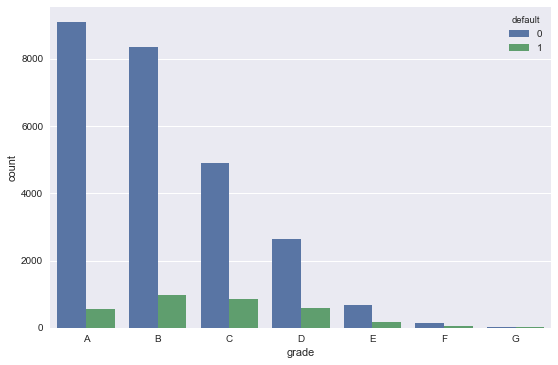

In [18]:
# Create a crosstab of default and grade - percentage by default type
sns.countplot(x="grade", data=df, hue="default", order=['A','B','C','D','E', 'F', 'G'])

###  Explore the impact of `ownership`  with `default`

## Explore the impact of `age` with `defualt`

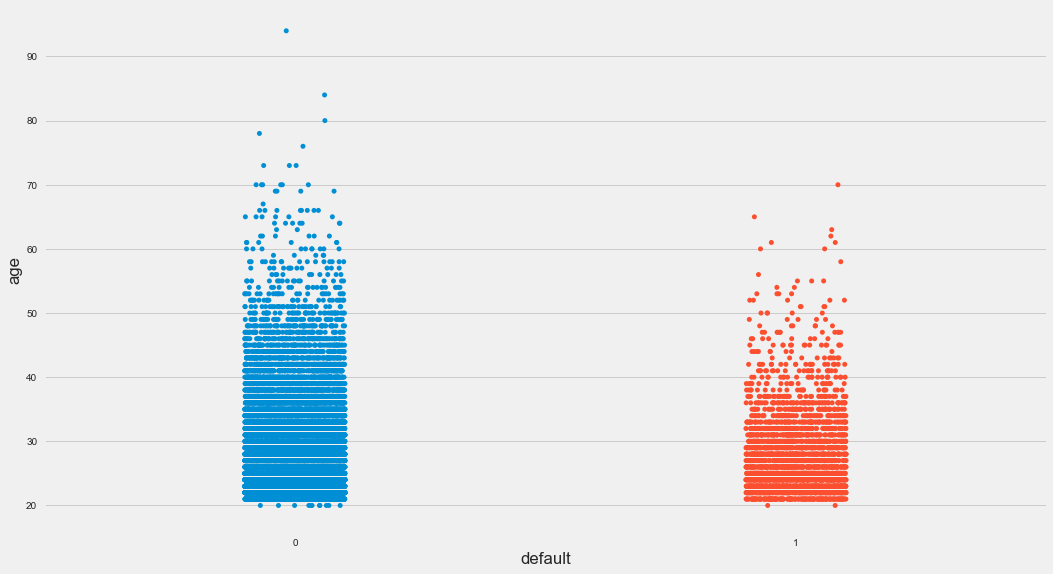

In [10]:
sns.stripplot(x="default", y="age", data=df, jitter=True)

### Explore the impact of  `income` with `default`

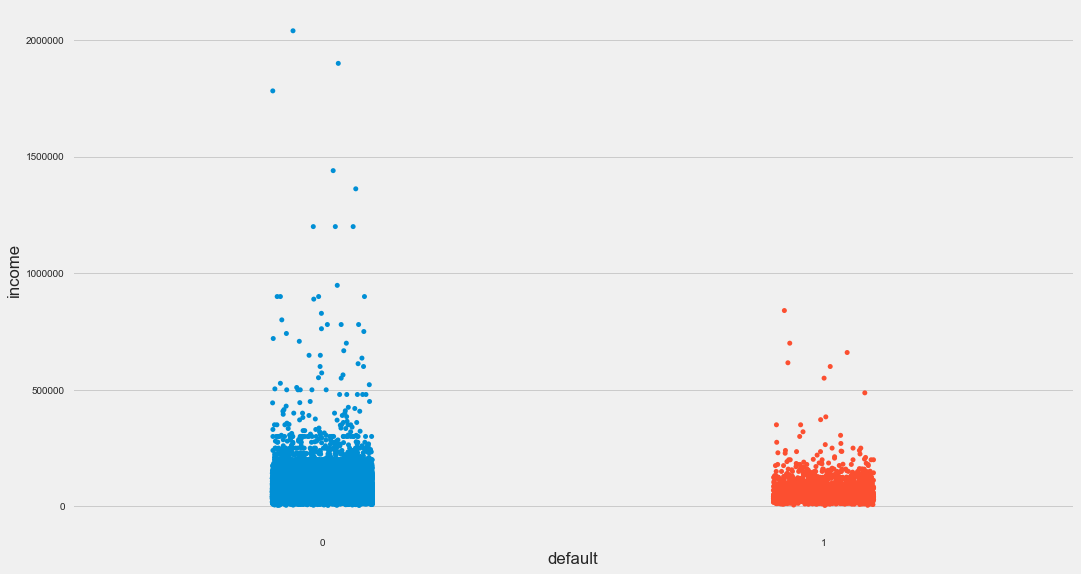

In [11]:
sns.stripplot(x="default", y="income", data=df, jitter=True)

In [12]:
# Create the transformed income variable
df['income_log'] = np.log(df.income)

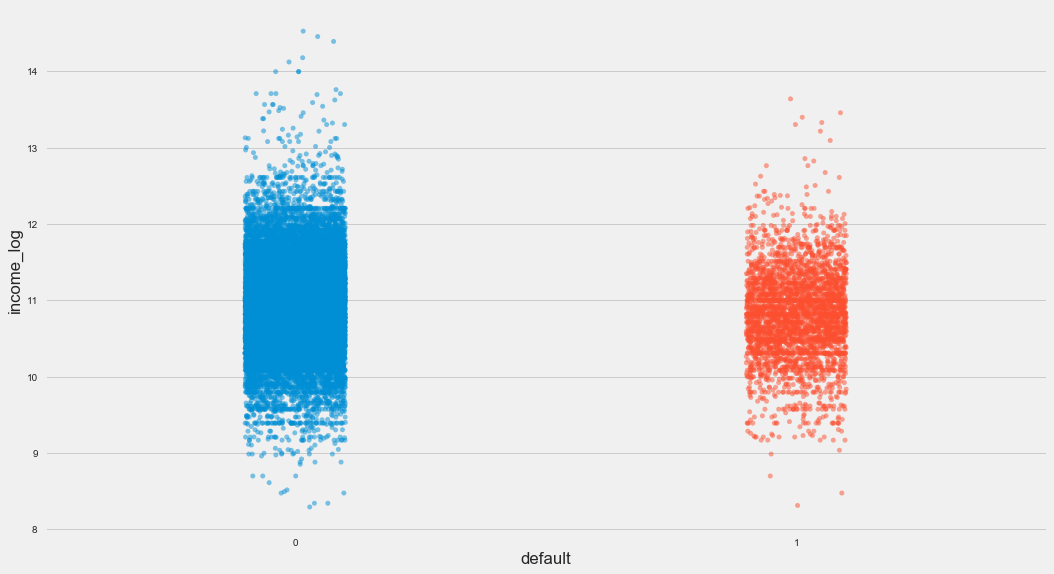

In [13]:
sns.stripplot(x="default", y="income_log", data=df, jitter=True ,alpha=0.5)

### Explore the impact of  `years` with `default`

## Three Variable Exploration

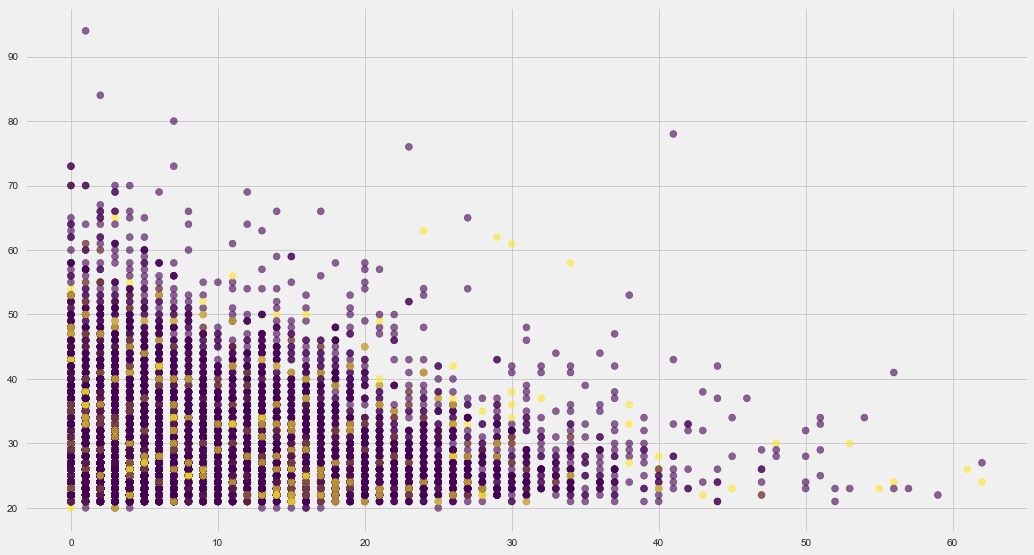

In [14]:
#Plot age, years and default
plt.scatter(df.years, df.age, c=df.default, alpha=0.6, cmap=plt.cm.viridis)

### Exercise: Plot `age`, `income` and `default`

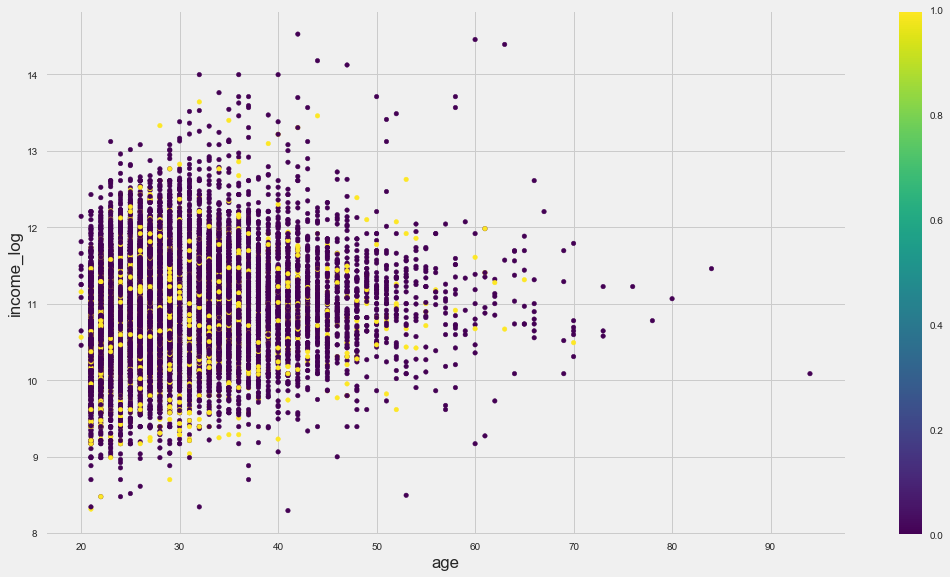

In [30]:
df.plot(kind="scatter", x='age', y='income_log', c=df.default, cmap=plt.cm.viridis)

### Exercise: Plot `age`, `grade` and `default`

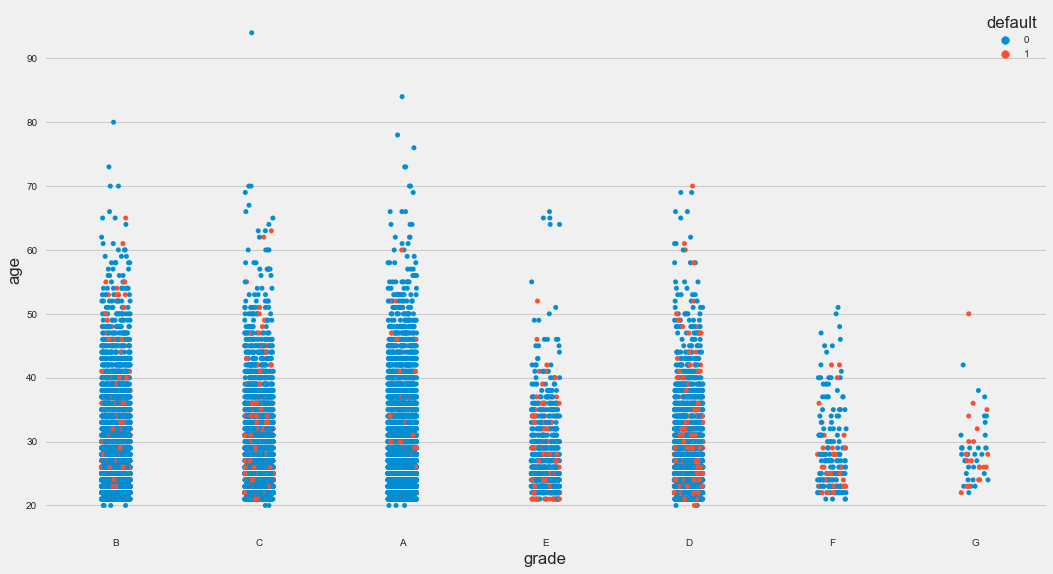

In [20]:
sns.stripplot(x="grade", y="age", data=df, hue="default" , jitter=True)

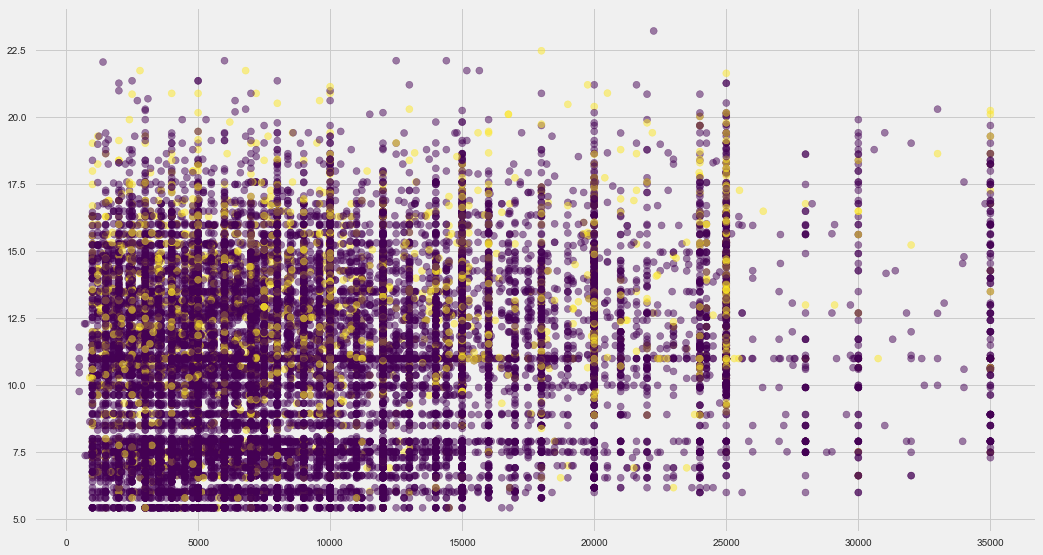

In [24]:
plt.scatter(x=df.amount, y=df.interest, c=df.default, alpha = 0.5, cmap="viridis")